<a href="https://colab.research.google.com/github/imnbid/MachinLearning2025/blob/main/mini-project-3/Q12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

**Load Dataset with gdown**

In [14]:
!gdown 1_x_0pjGgh6JXGjvwx5qWQJEpk08BOJb4

df = pd.read_csv("titanic.csv")

Downloading...
From: https://drive.google.com/uc?id=1_x_0pjGgh6JXGjvwx5qWQJEpk08BOJb4
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 11.9MB/s]


** Drop Unnecessary Columns**

In [15]:
df = df.drop(columns=[
    "PassengerId",
    "Name",
    "Ticket",
    "Cabin"
])

**Define Features and Target**

In [16]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

**Identify Numerical & Categorical Columns**

In [17]:
numerical_features = ["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Sex", "Embarked", "Pclass"]

**Preprocessing Pipelines**

In [18]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

**Train‑Test Split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**Random Forest (n_estimators = 200)**

In [20]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Train Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)

Random Forest Train Accuracy: 0.9831460674157303
Random Forest Test Accuracy: 0.8156424581005587


**📊 Confusion Matrix – Random Forest**

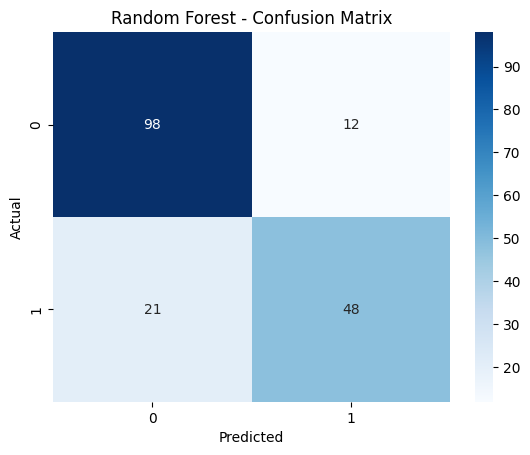

In [21]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Gradient Boosting Classifier**

In [22]:
gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

gb_train_acc = accuracy_score(y_train, y_train_pred_gb)
gb_test_acc = accuracy_score(y_test, y_test_pred_gb)

print("Gradient Boosting Train Accuracy:", gb_train_acc)
print("Gradient Boosting Test Accuracy:", gb_test_acc)

Gradient Boosting Train Accuracy: 0.9030898876404494
Gradient Boosting Test Accuracy: 0.7932960893854749


**📊 Confusion Matrix – Gradient Boosting**

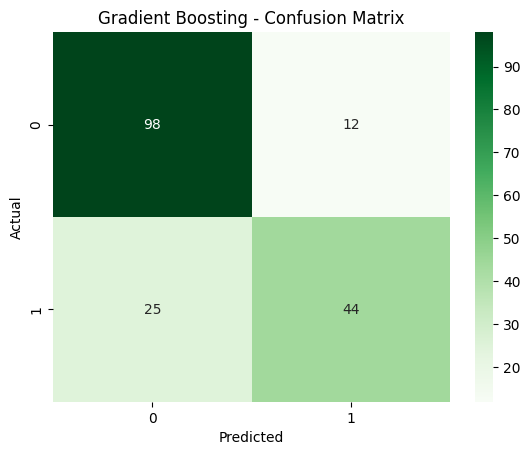

In [23]:
cm_gb = confusion_matrix(y_test, y_test_pred_gb)

sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Greens")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**📊 Comparison Plot (Train vs Test Accuracy)**

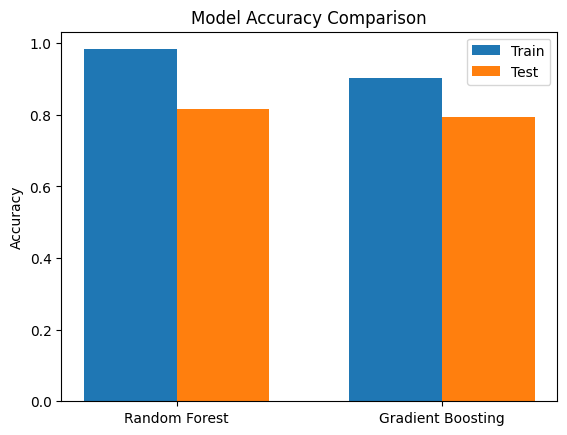

In [24]:
models = ["Random Forest", "Gradient Boosting"]
train_acc = [rf_train_acc, gb_train_acc]
test_acc = [rf_test_acc, gb_test_acc]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_acc, width, label="Train")
plt.bar(x + width/2, test_acc, width, label="Test")

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.show()